In [217]:
from qutip import *
import numpy as np
import importlib
import functions_fbq
from functions_fbq import *
importlib.reload(functions_fbq)
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams.update(plt.rcParamsDefault)
from mpl_toolkits import mplot3d
from scipy.interpolate import interp1d
from figurestyle import *

In [252]:
Ec = 40e9
El = 0.05e9
EDelta = 20e9
phi_ext = 0
r = 0.05
Hilbert_dim = 100

In [253]:
evals,ekets = eigensystem_fbq(Ec,El,EDelta,phi_ext,r, N = Hilbert_dim, eigvals = 0)

In [254]:
psi_0 = ekets[0]
psi_1 = ekets[1]

In [255]:
phi_ZPF=(2.0 * Ec / El) ** 0.25
phi_op= (destroy(Hilbert_dim).dag() + destroy(Hilbert_dim)) * phi_ZPF
phi_ket_list = phi_op.eigenstates()[1]

In [256]:
# theta = 0.2
# phi = 0.1
# i = 4
# first_term = np.abs((psi_0.dag()*(np.cos(theta)*tensor(phi_ket_list[i],basis(2,0)) + np.sin(theta)*np.exp(1j*phi)*tensor(phi_ket_list[i],basis(2,1))))[0,0])**2
# second_term = np.abs((psi_1.dag()*(np.cos(theta)*tensor(phi_ket_list[i],basis(2,0)) + np.sin(theta)*np.exp(1j*phi)*tensor(phi_ket_list[i],basis(2,1))))[0,0])**2

def value_to_integrate(theta,phi,i):
    return (np.abs((psi_0.dag()*(np.cos(theta/2)*tensor(phi_ket_list[i],basis(2,0)) + np.sin(theta/2)*np.exp(1j*phi)*tensor(phi_ket_list[i],basis(2,1))))[0,0])**2 , np.abs((psi_1.dag()*(np.cos(theta/2)*tensor(phi_ket_list[i],basis(2,0)) + np.sin(theta/2)*np.exp(1j*phi)*tensor(phi_ket_list[i],basis(2,1))))[0,0])**2)

In [257]:
theta_discretization = 5
phi_discretization = 12

A = np.zeros((Hilbert_dim,theta_discretization,phi_discretization))
B = np.zeros((Hilbert_dim,theta_discretization,phi_discretization))

for i in tqdm(range(Hilbert_dim)):
    for j,theta in enumerate(np.linspace(0,np.pi,theta_discretization)):
        for k,phi in enumerate(np.linspace(0,2*np.pi,phi_discretization + 1)[:-1]):
            A[i,j,k],B[i,j,k] = value_to_integrate(theta,phi, i)
(A*B).sum()/A.sum()/B.sum()

100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


0.0005463204952868357

In [246]:
theta_discretization = 10
phi_discretization = 10

A = np.zeros((Hilbert_dim,theta_discretization,phi_discretization))
B = np.zeros((Hilbert_dim,theta_discretization,phi_discretization))

for i in tqdm(range(Hilbert_dim)):
    for j,theta in enumerate(np.arccos(1-2*np.random.rand(theta_discretization))):
        for k,phi in enumerate(2*np.pi*np.random.rand(phi_discretization)):
            A[i,j,k],B[i,j,k] = value_to_integrate(theta,phi, i)
(A*B).sum()/A.sum()/B.sum()

100%|██████████| 200/200 [00:50<00:00,  3.99it/s]


0.00032861589444099684

In [243]:
np.random.rand(10)

array([0.02646898, 0.25105844, 0.15166066, 0.89682531, 0.64113748,
       0.03650767, 0.62132983, 0.31386085, 0.87837858, 0.1802926 ])

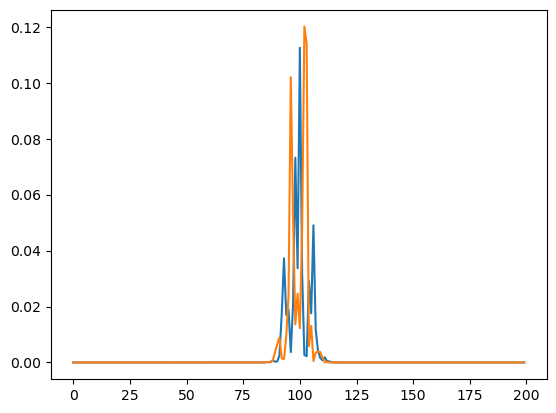

In [251]:
plt.plot(A[:,0,0])
plt.plot(B[:,0,0])




plt.show()

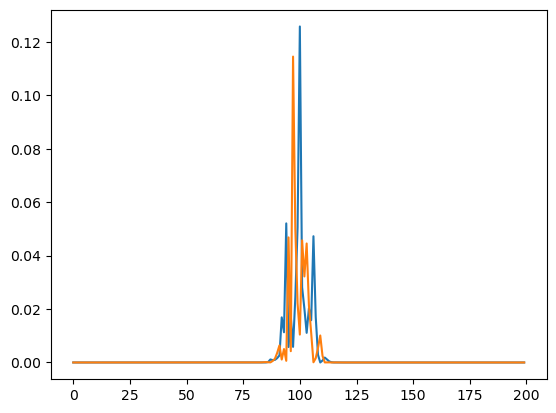

In [249]:
plt.plot(A[:,-1,0])
plt.plot(B[:,-1,0])
plt.show()

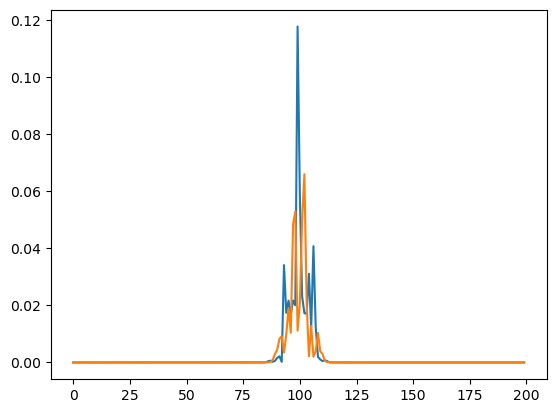

In [248]:
plt.plot(A[:,2,0])
plt.plot(B[:,2,0])
plt.show()

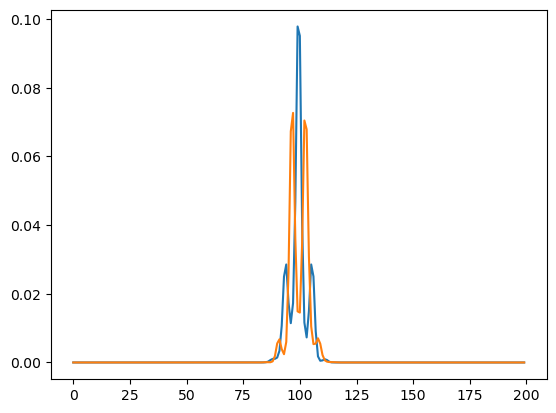

In [241]:
plt.plot(A[:,2,3])
plt.plot(B[:,2,3])
plt.show()

In [61]:
# sum array_to_integrate[i,j,k] just over i
sum_over_i = np.sum(array_to_integrate, axis = 0)


In [33]:
# obtain the value of  psi_0.dag()*np.cos(theta)*tensor(phi_ket_list[i],basis(2,0)

(psi_0.dag() * tensor(phi_ket_list[i],basis(2,0)).full())[0,0]

2.903877279051368e-06j